In [ ]:
'''

FedMedICL_COVID/
├── configs/
├── dataset/
│   ├── CovidSurveillanceDataset.py
│   └── __init__.py
├── model/
│   ├── TabTransformer.py
│   └── __init__.py
├── training/
│   ├── algorithms.py         # ← Contains federated_train_FedDG, federated_train_FedAvg, fedCB (if added), train_erm
│   ├── federated_trainer.py  # ← Existing code if still used; might call functions from algorithms.py
│   └── client_update.py
├── reporting/
│   ├── metrics.py
│   └── plots.py
├── utils/
│   ├── logger.py
│   └── saver.py
├── experiments/
├── evaluation.py
└── train_fedmedicl.py

'''

'\n\nFedMedICL_COVID/\n├── configs/\n├── dataset/\n│   ├── CovidSurveillanceDataset.py\n│   └── __init__.py\n├── model/\n│   ├── TabTransformer.py\n│   └── __init__.py\n├── training/\n│   ├── algorithms.py         # ← Contains federated_train_FedDG, federated_train_FedAvg, fedCB (if added), train_erm\n│   ├── federated_trainer.py  # ← Existing code if still used; might call functions from algorithms.py\n│   └── client_update.py\n├── reporting/\n│   ├── metrics.py\n│   └── plots.py\n├── utils/\n│   ├── logger.py\n│   └── saver.py\n├── experiments/\n├── evaluation.py\n└── train_fedmedicl.py\n\n'

# READme.md



# FedMedICL_COVID: Federated Learning Pipeline for COVID-19 Case Surveillance

This repository implements a federated learning pipeline inspired by FedMedICL, adapted for a tabular COVID-19 case surveillance dataset.

## Folder Structure


## Usage

1. **Configuration**: Edit `configs/fed_covid_example.yaml` as needed.

2. **Run Training**:
   - With YAML config:
     ```bash
     python scripts/train_covid_federated.py --config configs/fed_covid_example.yaml
     ```
   - With CLI flags:
     ```bash
     python scripts/train_covid_federated.py --dataset /path/to/your/data.csv --algorithm FedAvgTemporal --num_clients 10 --num_tasks 4 --rounds 50 --local_epochs 1 --batch_size 32 --lr 0.001 --seed 42 --output_dir ./results --use_wandb
     ```

3. **Outputs**:
   - Training logs are stored in `output_dir/training.log`
   - Accuracy and loss plots per task are saved as PNG files in `output_dir`
   - Final evaluation on held-out test data is printed at the end.

## Algorithms

- **FedAvg**: Standard federated averaging.
- **FedAvgTemporal**: A custom algorithm that adds a proximal term in client updates and time-weighted aggregation on the server to better handle temporal shifts.

## Requirements

- Python 3.7+
- PyTorch
- YAML
- Matplotlib (for plots)
- Optionally, wandb for logging


In [ ]:
!apt-get install tree
!tree -L 3 /content/FedMedICL_COVID

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (54.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/content/FedMedICL_COVID
├── configs
│   ├── covid_tabular.yaml
│   └── __init__.py
├── dataset
│   ├── CovidSurveillanceDataset.py
│   ├── __init__.py
│   └── __pycache__
│       ├── COVIDDataset.cpython-311.pyc
│       ├── CovidSurveillanceDataset.cpython-311.pyc
│       ├── __init__.

## Data Analysis and Visualization

In [ ]:
import pandas as pd

# File path to the CSV
file_path = '/content/COVID-19_Case_Surveillance_Public_Use_Data.csv'

# Read a small sample to quickly check the column names
df_sample = pd.read_csv(file_path, nrows=5)
print("Columns in CSV:")
print(df_sample.columns.tolist())

# Load the entire dataset. Using low_memory=False prevents potential dtype inference issues.
df = pd.read_csv(file_path, low_memory=False)

# Print the overall dataset shape (rows, columns)
print("\nDataset shape:", df.shape)

# Display the first 5 rows of the dataset
print("\nFirst 5 rows:")
print(df.head())

# Print detailed info about the DataFrame such as column types and non-null counts
print("\nDataset Info:")
print(df.info())

# Display descriptive statistics for both numerical and categorical data
print("\nDescriptive statistics (including categorical columns):")
print(df.describe(include='all'))

# Check and print the number of missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())



Columns in CSV:
['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex', 'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']

Dataset shape: (8405079, 11)

First 5 rows:
  cdc_report_dt pos_spec_dt    onset_dt             current_status   sex  \
0    2020/11/10  2020/11/10         NaN  Laboratory-confirmed case  Male   
1    2020/11/14  2020/11/10  2020/11/10  Laboratory-confirmed case  Male   
2    2020/11/19  2020/11/10  2020/11/09  Laboratory-confirmed case  Male   
3    2020/11/14  2020/11/10         NaN  Laboratory-confirmed case  Male   
4    2020/11/13  2020/11/10  2020/11/10  Laboratory-confirmed case  Male   

       age_group Race and ethnicity (combined)  hosp_yn   icu_yn death_yn  \
0  10 - 19 Years           Black, Non-Hispanic       No  Unknown       No   
1  10 - 19 Years           Black, Non-Hispanic       No       No       No   
2  10 - 19 Years           Black, Non-Hispanic       No       No       No   
3  10 - 19 

Loaded 8,405,079 rows and 11 columns.

=== HEAD ===
  cdc_report_dt pos_spec_dt    onset_dt             current_status   sex  \
0    2020/11/10  2020/11/10         NaN  Laboratory-confirmed case  Male   
1    2020/11/14  2020/11/10  2020/11/10  Laboratory-confirmed case  Male   
2    2020/11/19  2020/11/10  2020/11/09  Laboratory-confirmed case  Male   
3    2020/11/14  2020/11/10         NaN  Laboratory-confirmed case  Male   
4    2020/11/13  2020/11/10  2020/11/10  Laboratory-confirmed case  Male   

       age_group Race and ethnicity (combined)  hosp_yn   icu_yn death_yn  \
0  10 - 19 Years           Black, Non-Hispanic       No  Unknown       No   
1  10 - 19 Years           Black, Non-Hispanic       No       No       No   
2  10 - 19 Years           Black, Non-Hispanic       No       No       No   
3  10 - 19 Years           Black, Non-Hispanic  Missing  Missing       No   
4  10 - 19 Years           Black, Non-Hispanic       No       No       No   

  medcond_yn  
0         No 

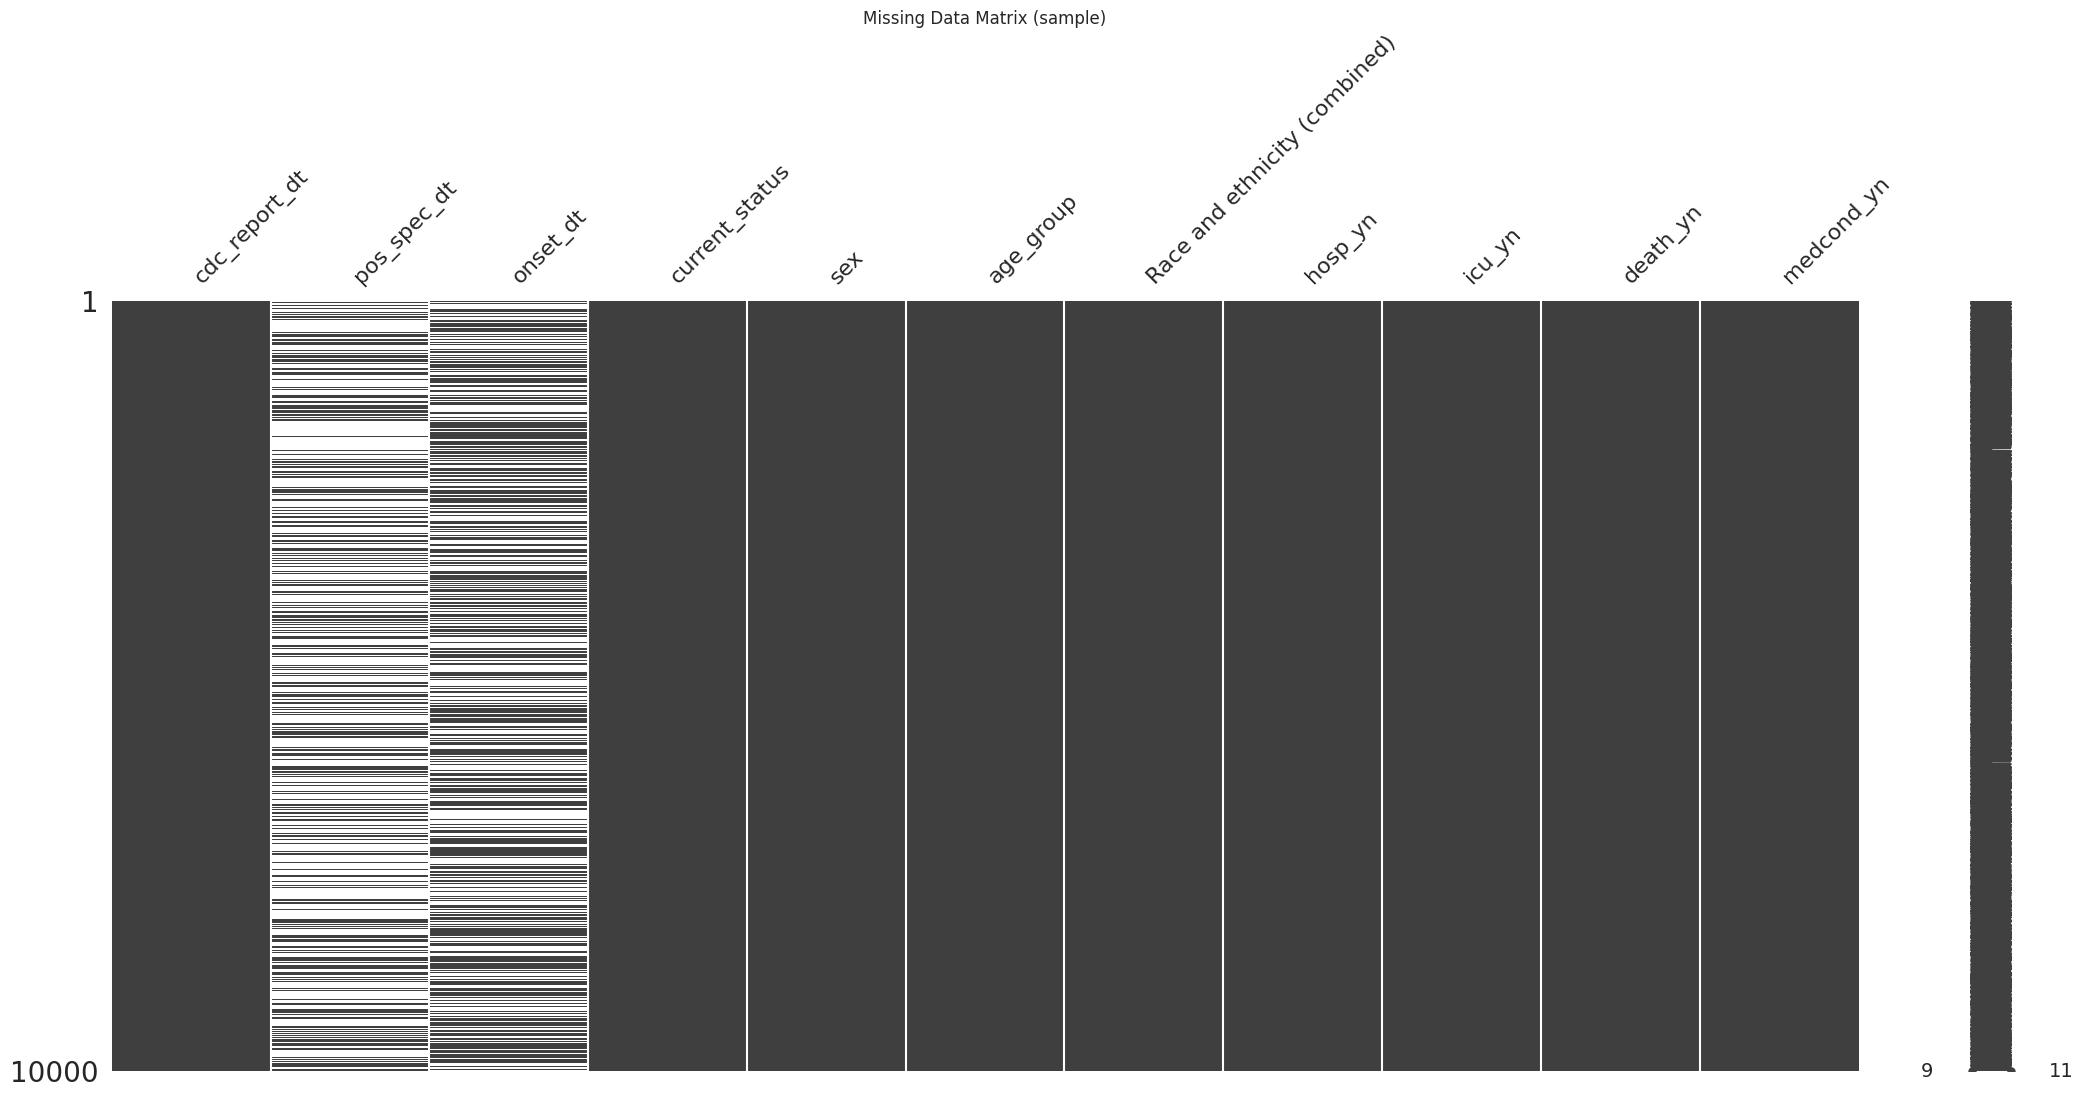

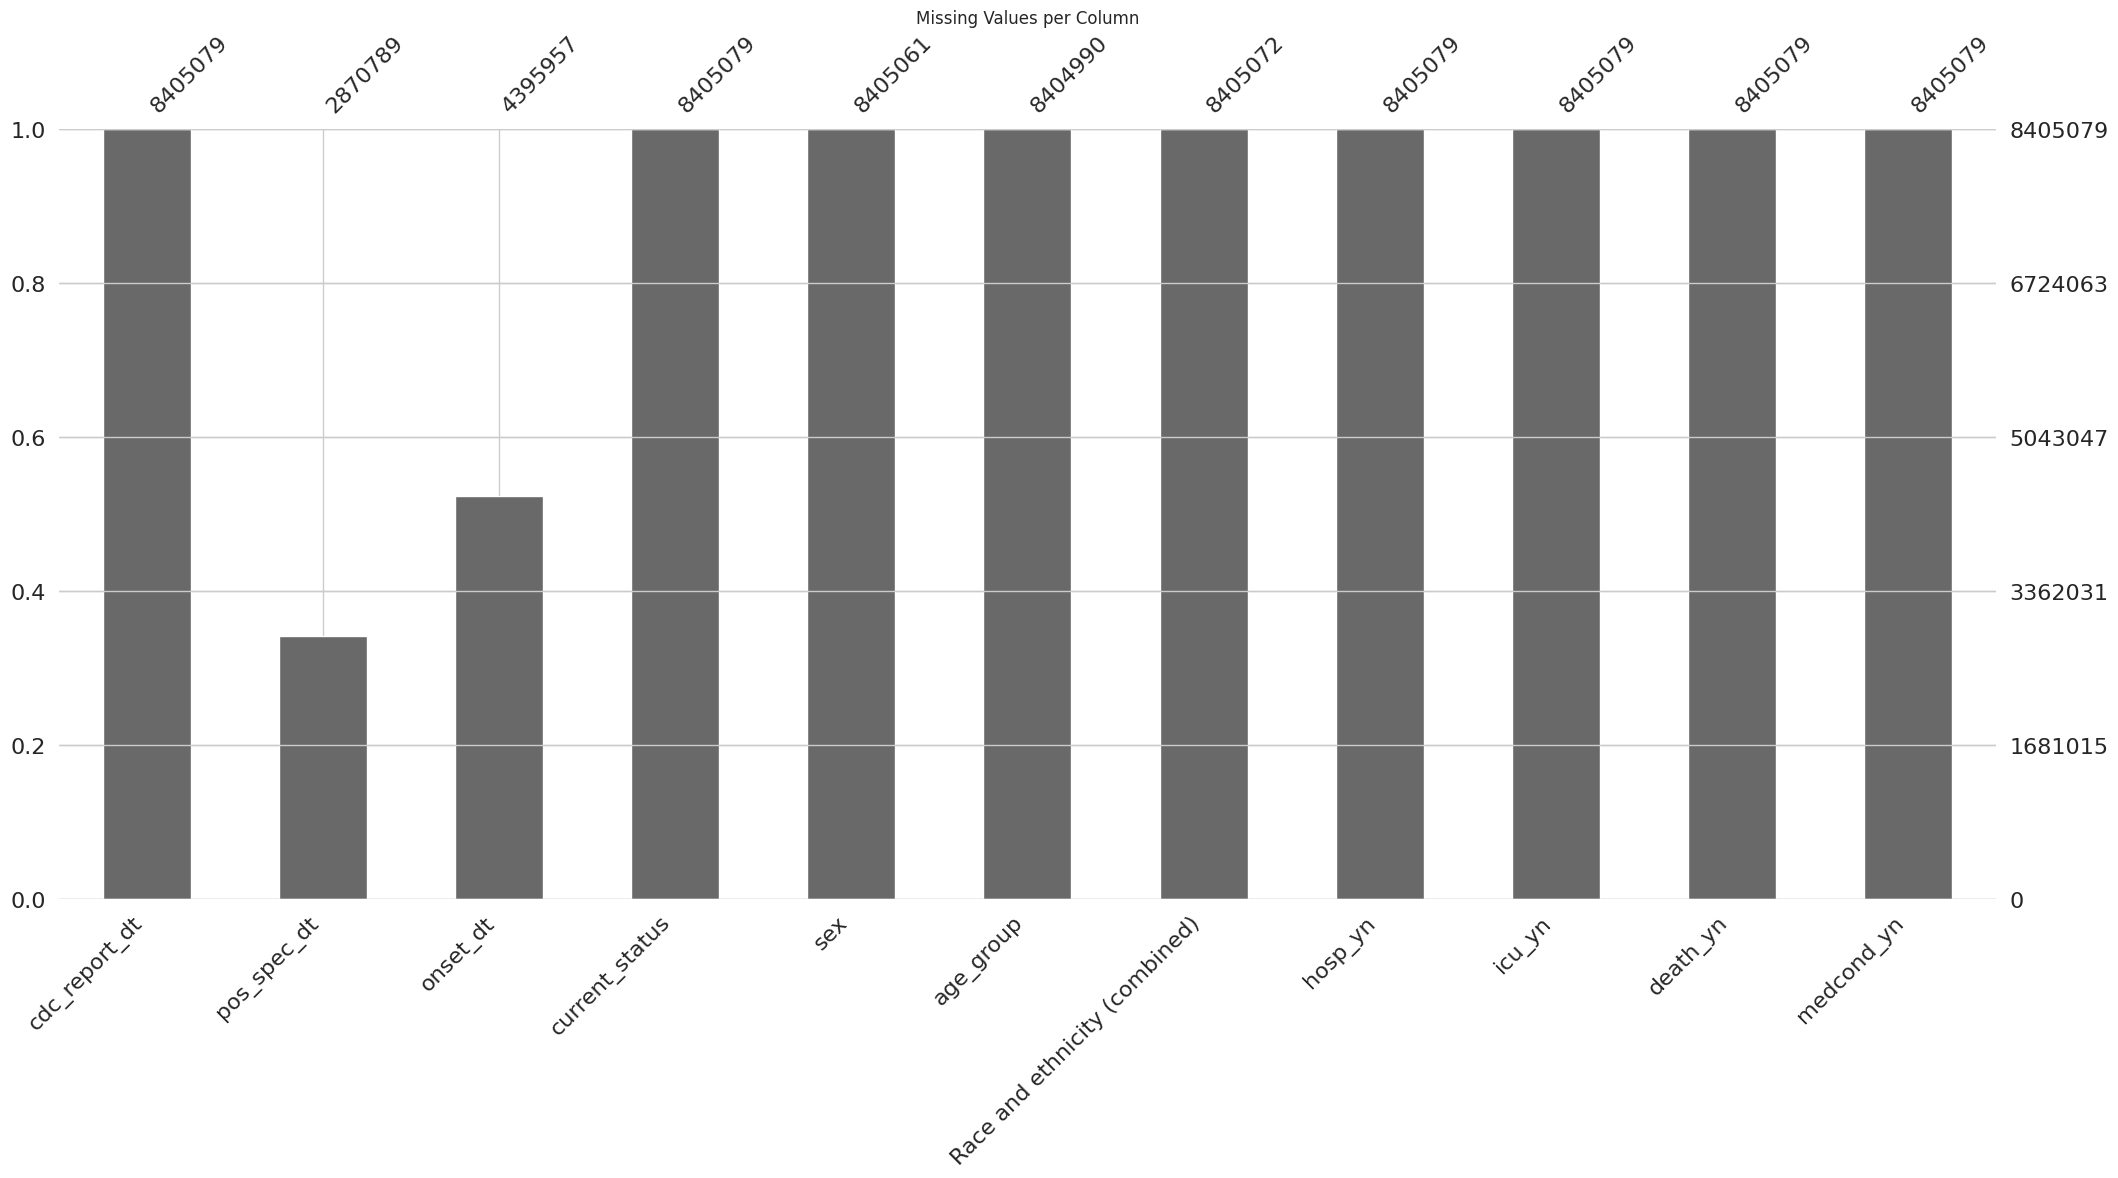


=== UNIVARIATE ANALYSIS ===


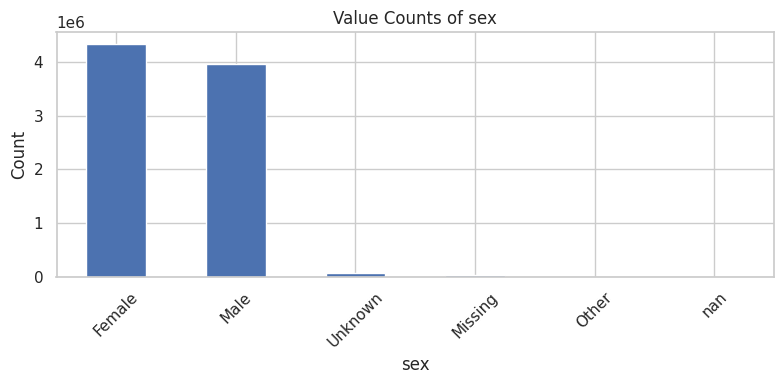

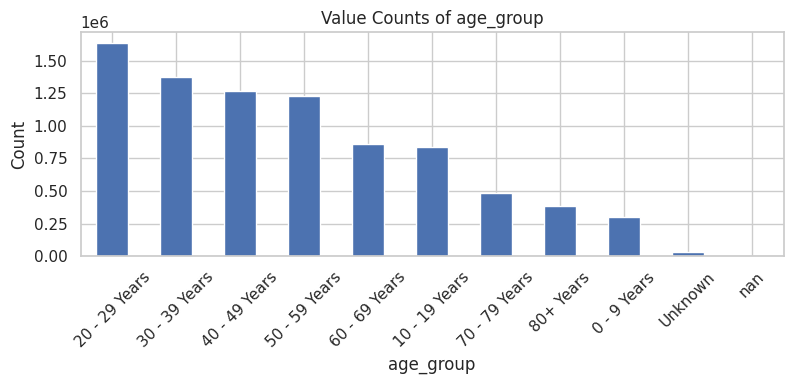

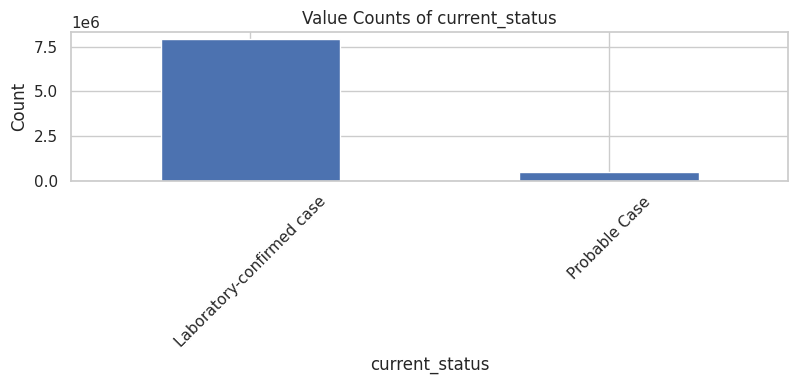

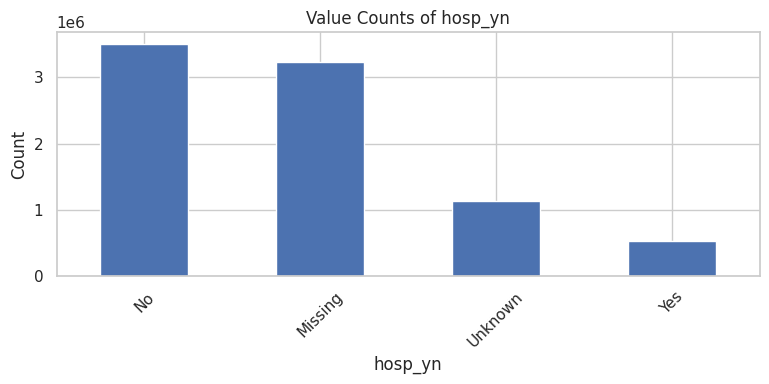

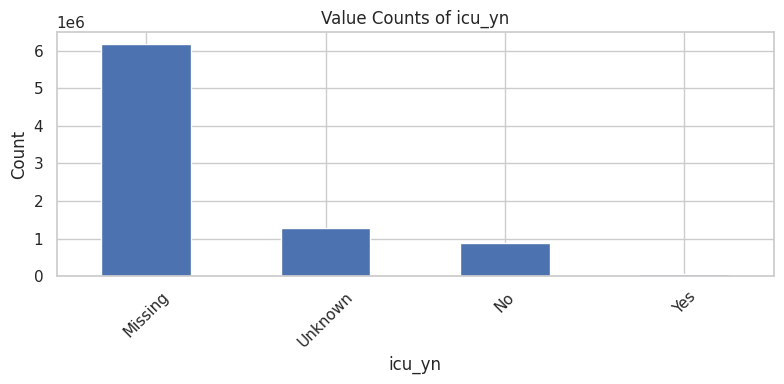

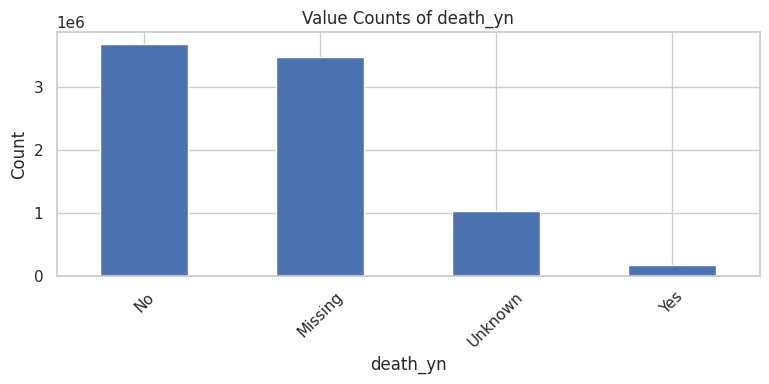

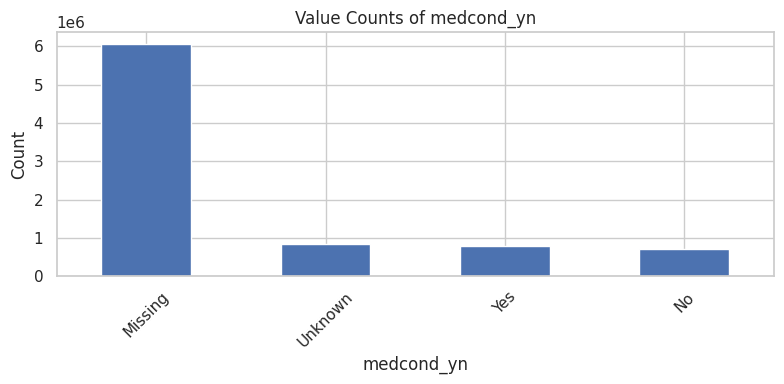


=== BIVARIATE ANALYSIS ===


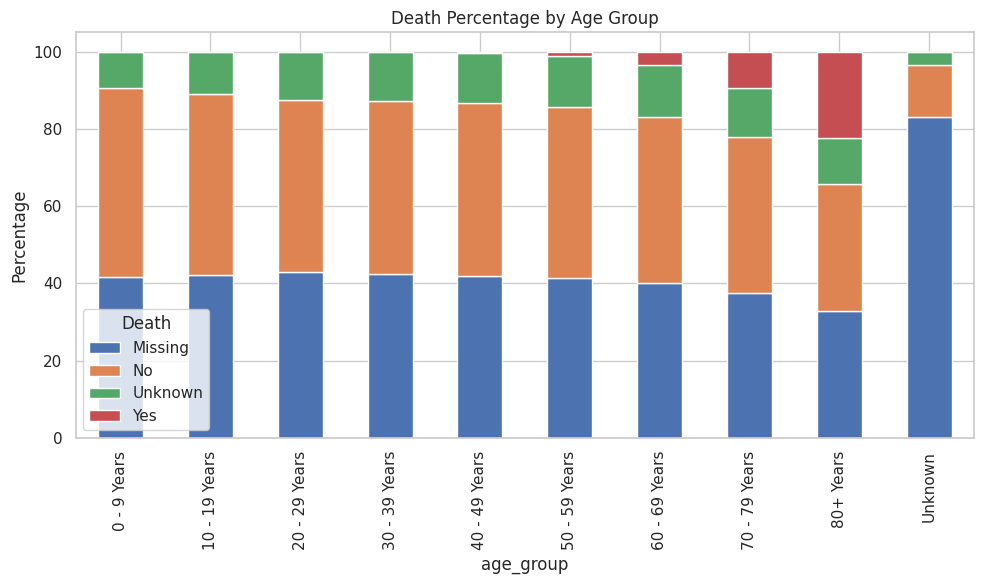


=== Death Outcome Counts ===
death_yn
No         3690813
Missing    3486923
Unknown    1043766
Yes         183577
Name: count, dtype: int64


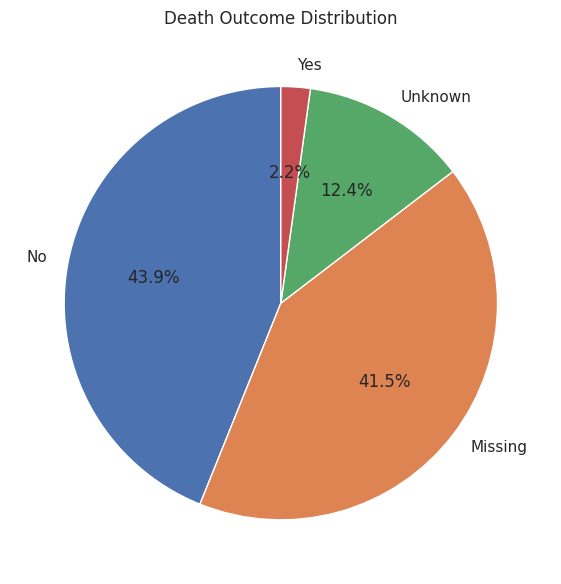


Cleaned data saved to /content/COVID19_Case_Surveillance_Cleaned.csv


In [ ]:
# Exploratory Data Analysis for COVID-19 Case Surveillance Public Use Data
# Author: ChatGPT (o3)
# Date: 2025‑04‑12
# -------------------------------------------------------------
# This script performs a comprehensive exploratory data analysis (EDA)
# of the COVID‑19 Case Surveillance Public Use Dataset.  It is designed
# to be run in Google Colab (or any Jupyter environment) where the CSV
# file is located at /content/COVID-19_Case_Surveillance_Public_Use_Data.csv.
# -------------------------------------------------------------

# ===========================
# 0. Setup & Dependencies
# ===========================
# If you are running in Colab for the first time, uncomment the line below
# to install the optional "missingno" library (handy for visualizing
# missing data patterns).  All other libraries are pre‑installed in Colab.
# -------------------------------------------------------------
# !pip install missingno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.dates as mdates

# Display & style options
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", context="notebook")

# Ensure plots render a bit larger
plt.rcParams["figure.figsize"] = (10, 6)


# ===========================
# 1. Load the dataset
# ===========================
CSV_PATH = "/content/COVID-19_Case_Surveillance_Public_Use_Data.csv"

df = pd.read_csv(CSV_PATH, low_memory=False)
print(f"Loaded {df.shape[0]:,} rows and {df.shape[1]} columns.")


# ===========================
# 2. Initial inspection
# ===========================
print("\n=== HEAD ===")
print(df.head())

print("\n=== INFO ===")
print(df.info())

print("\n=== DESCRIBE (numeric) ===")
print(df.describe().T)

print("\n=== DESCRIBE (categorical) ===")
print(df.describe(include=["object", "category"]).T)


# ===========================
# 3. Missing‑value analysis
# ===========================
print("\n=== PERCENT MISSING PER COLUMN ===")
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
print(missing_pct)

# Visualize missingness on a 10 k‑row random sample (for speed)
msno.matrix(df.sample(min(10000, len(df)), random_state=42))
plt.title("Missing Data Matrix (sample)")
plt.show()

msno.bar(df)
plt.title("Missing Values per Column")
plt.show()


# ===========================
# 4. Data‑type adjustments & feature engineering
# ===========================
# 4.1  Dates ---------------------------------------------------
if "case_month" in df.columns:
    df["case_month"] = pd.to_datetime(df["case_month"], format="%Y-%m", errors="coerce")

# 4.2  Categoricals ------------------------------------------
# Explicitly cast likely categorical columns to the category dtype
categorical_cols = [
    "sex", "age_group", "race", "ethnicity", "current_status", "hosp_yn",
    "icu_yn", "death_yn", "medcond_yn", "pna_yn", "asthma_yn", "diabetes_yn",
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")


# ===========================
# 5. Univariate analysis
# ===========================
print("\n=== UNIVARIATE ANALYSIS ===")

# 5.1  Numeric distributions ----------------------------------
num_cols = df.select_dtypes(include=["number"]).columns
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 5.2  Categorical counts -------------------------------------
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        df[col].value_counts(dropna=False).plot(kind="bar")
        plt.title(f"Value Counts of {col}")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# ===========================
# 6. Bivariate analysis
# ===========================
print("\n=== BIVARIATE ANALYSIS ===")

# 6.1  Correlation heatmap (numeric) ---------------------------
if len(num_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()

# 6.2  Outcome by age group ------------------------------------
if {"death_yn", "age_group"}.issubset(df.columns):
    death_age = pd.crosstab(df["age_group"], df["death_yn"], normalize="index") * 100
    death_age.plot(kind="bar", stacked=True)
    plt.title("Death Percentage by Age Group")
    plt.ylabel("Percentage")
    plt.legend(title="Death")
    plt.tight_layout()
    plt.show()

# 6.3  Hospitalization rate over time --------------------------
if {"case_month", "hosp_yn"}.issubset(df.columns):
    hosp_time = df.groupby(["case_month", "hosp_yn"]).size().unstack().fillna(0)
    hosp_rate = hosp_time.div(hosp_time.sum(axis=1), axis=0) * 100
    hosp_rate.plot(figsize=(12, 6))
    plt.title("Hospitalization Rate Over Time")
    plt.ylabel("Percentage")
    plt.xlabel("Case Month")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ===========================
# 7. Time‑series of total cases
# ===========================
if "case_month" in df.columns:
    cases_month = df["case_month"].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(cases_month.index, cases_month.values)
    plt.title("Number of Cases Over Time")
    plt.ylabel("Cases")
    plt.xlabel("Case Month")
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ===========================
# 8. Outcome distribution
# ===========================
if "death_yn" in df.columns:
    outcome_counts = df["death_yn"].value_counts(dropna=False)
    print("\n=== Death Outcome Counts ===")
    print(outcome_counts)
    plt.figure()
    outcome_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title("Death Outcome Distribution")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


# ===========================
# 9. Save a cleaned subset (optional)
# ===========================
# You can drop columns with > X% missing or otherwise filter rows as needed.
# Below we simply save the type‑adjusted DataFrame.
CLEAN_PATH = "/content/COVID19_Case_Surveillance_Cleaned.csv"
df.to_csv(CLEAN_PATH, index=False)
print(f"\nCleaned data saved to {CLEAN_PATH}")


# ===========================
# 10. Next steps (suggestions)
# ===========================
# ‑ Feature engineering (e.g., derive comorbidity counts, rolling averages)
# ‑ Statistical testing (chi‑square, t‑tests) between key groups
# ‑ Modeling (logistic regression, survival analysis)
# ‑ Geospatial analysis if location data are available
# -------------------------------------------------------------
# End of EDA script


## Importing Dataset

In [ ]:
# Unzip the first file (escape spaces/special characters)
!unzip "/content/archive.zip" -d /content/
!unzip /content/FedMedICL_COVID.zip -d /content/

Archive:  /content/archive.zip
  inflating: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv  
  inflating: /content/Covid-19_Ver2/Covid-19_Ver2  
Archive:  /content/FedMedICL_COVID.zip
   creating: /content/FedMedICL_COVID/
   creating: /content/FedMedICL_COVID/.ipynb_checkpoints/
   creating: /content/FedMedICL_COVID/.ipynb_checkpoints/.ipynb_checkpoints/
  inflating: /content/FedMedICL_COVID/train_fedmedicl.py  
   creating: /content/FedMedICL_COVID/model/
   creating: /content/FedMedICL_COVID/model/.ipynb_checkpoints/
  inflating: /content/FedMedICL_COVID/model/BNAdapter.py  
  inflating: /content/FedMedICL_COVID/model/TabTransformer.py  
   creating: /content/FedMedICL_COVID/model/__pycache__/
  inflating: /content/FedMedICL_COVID/model/__pycache__/TabTransformer.cpython-311.pyc  
  inflating: /content/FedMedICL_COVID/model/__pycache__/__init__.cpython-311.pyc  
  inflating: /content/FedMedICL_COVID/model/__pycache__/TabularModel.cpython-311.pyc  
  inflating: /content/FedM

In [ ]:
%cd /content
!zip -r FedMedICL_COVID.zip FedMedICL_COVID


/content
  adding: FedMedICL_COVID/ (stored 0%)
  adding: FedMedICL_COVID/requirements.txt (deflated 57%)
  adding: FedMedICL_COVID/utils/ (stored 0%)
  adding: FedMedICL_COVID/utils/.ipynb_checkpoints/ (stored 0%)
  adding: FedMedICL_COVID/utils/logger.py (deflated 45%)
  adding: FedMedICL_COVID/utils/saver.py (deflated 60%)
  adding: FedMedICL_COVID/utils/__pycache__/ (stored 0%)
  adding: FedMedICL_COVID/utils/__pycache__/saver.cpython-311.pyc (deflated 51%)
  adding: FedMedICL_COVID/utils/__pycache__/logger.cpython-311.pyc (deflated 49%)
  adding: FedMedICL_COVID/.ipynb_checkpoints/ (stored 0%)
  adding: FedMedICL_COVID/.ipynb_checkpoints/.ipynb_checkpoints/ (stored 0%)
  adding: FedMedICL_COVID/training/ (stored 0%)
  adding: FedMedICL_COVID/training/.ipynb_checkpoints/ (stored 0%)
  adding: FedMedICL_COVID/training/federated_trainer.py (deflated 73%)
  adding: FedMedICL_COVID/training/__pycache__/ (stored 0%)
  adding: FedMedICL_COVID/training/__pycache__/federated_trainer.cpytho

## Installing Dependencies

In [ ]:
!pip install torch torchvision pandas numpy matplotlib wandb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

### Acquiring the Versions of the libraries being used

In [ ]:
!pip freeze > requirements.txt


## Training

In [ ]:
#!/bin/bash
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm FedDG \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 20 \
    --adapter_rounds 5 \
    --emb_dim 256


2025-04-13 10:49:23,052 | INFO | ============================================================
2025-04-13 10:49:23,052 | INFO | Experiment arguments:
2025-04-13 10:49:23,053 | INFO | adapter_rounds: 5
algorithm: FedDG
amp: false
batch_size: 4096
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 256
hidden_dim: 512
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/feddg_20R
rounds: 20
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-13 10:49:23,053 | INFO | ============================================================
2025-04-13 10:49:23,148 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-13 10:52:14,437 | INFO | Training on device: cuda
2025-04-13 10:52:14,437 | INFO | Starting FedDG training...
2025-04-13 10:52:14,599 | INFO | Round 1/20
Round 1/20:   0% 0/5 [00:00<?, ?

In [ ]:
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm FedAvg \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 5 \
    --adapter_rounds 5 \
    --emb_dim 256

2025-04-12 14:47:08,837 | INFO | ============================================================
2025-04-12 14:47:08,837 | INFO | Experiment arguments:
2025-04-12 14:47:08,838 | INFO | adapter_rounds: 5
algorithm: FedAvg
amp: false
batch_size: 4096
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 256
hidden_dim: 512
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/fedavg_5R
rounds: 5
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-12 14:47:08,838 | INFO | ============================================================
2025-04-12 14:47:08,887 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-12 14:49:59,426 | INFO | Training on device: cuda
2025-04-12 14:49:59,426 | INFO | Starting FedAvg training...
2025-04-12 14:49:59,538 | INFO | Round 1/5 (FedAvg)
Round 1/5 (FedAvg):   0

In [ ]:
#!/bin/bash
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm fedcb \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 20 \
    --adapter_rounds 5 \
    --emb_dim 256


2025-04-12 21:17:31,074 | INFO | ============================================================
2025-04-12 21:17:31,074 | INFO | Experiment arguments:
2025-04-12 21:17:31,076 | INFO | adapter_rounds: 5
algorithm: fedcb
amp: false
batch_size: 4096
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 256
hidden_dim: 512
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/fedcb_20R
rounds: 20
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-12 21:17:31,076 | INFO | ============================================================
2025-04-12 21:17:31,099 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-12 21:20:20,188 | INFO | Training on device: cuda
2025-04-12 21:20:20,188 | INFO | Starting FedCB training...
2025-04-12 21:20:20,306 | INFO | Round 1/20 (FedCB)
Round 1/20 (FedCB):   0%

In [ ]:
#!/bin/bash
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm ERM \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 5 \
    --adapter_rounds 5 \
    --emb_dim 256


2025-04-12 15:08:13,805 | INFO | ============================================================
2025-04-12 15:08:13,805 | INFO | Experiment arguments:
2025-04-12 15:08:13,806 | INFO | adapter_rounds: 5
algorithm: ERM
amp: false
batch_size: 4096
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 256
hidden_dim: 512
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/erm_5R
rounds: 5
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-12 15:08:13,806 | INFO | ============================================================
2025-04-12 15:08:13,854 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-12 15:11:03,476 | INFO | Training on device: cuda
2025-04-12 15:11:03,476 | INFO | Starting ERM training (centralized baseline)...
2025-04-12 15:12:07,678 | INFO | ERM Epoch 1/10, Loss: 0.1815

In [ ]:
#!/bin/bash
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm feddghybrid \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 20 \
    --adapter_rounds 5 \
    --emb_dim 256


2025-04-15 08:39:38,920 | INFO | ============================================================
2025-04-15 08:39:38,920 | INFO | Experiment arguments:
2025-04-15 08:39:38,921 | INFO | adapter_rounds: 5
algorithm: feddghybrid
amp: false
batch_size: 4096
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 256
hidden_dim: 512
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/feddghybrid_20R
rounds: 20
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-15 08:39:38,921 | INFO | ============================================================
2025-04-15 08:39:38,999 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-15 08:42:27,809 | INFO | Training on device: cuda
2025-04-15 08:42:27,809 | INFO | Starting FedDGHybrid training...
2025-04-15 09:10:13,045 | INFO | Starting adapter fine-tun

- lambda_consist=0.9,  # adjust as needed
- beta_kd=0.2,        # adjust as needed
- meta_eta=0.20,

In [ ]:
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm fedaim \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 20 \
    --adapter_rounds 5 \
    --emb_dim 512 \
    --batch_size 512

2025-04-17 07:00:12,967 | INFO | ============================================================
2025-04-17 07:00:12,968 | INFO | Experiment arguments:
2025-04-17 07:00:12,969 | INFO | adapter_rounds: 5
algorithm: fedaim
amp: false
batch_size: 512
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 512
hidden_dim: 512
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/fedaim_20R
rounds: 20
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-17 07:00:12,969 | INFO | ============================================================
2025-04-17 07:00:13,043 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-17 07:03:02,465 | INFO | Training on device: cuda
2025-04-17 07:03:02,465 | INFO | Starting FedAIM training...
2025-04-17 07:03:02,628 | INFO | Round 1/20 (FedAIM)
Round 1/20 (FedAIM): 

In [ ]:
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm fedaim \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 20 \
    --adapter_rounds 5 \
    --emb_dim 512 \
    --batch_size 512

2025-04-17 14:37:23,700 | INFO | ============================================================
2025-04-17 14:37:23,700 | INFO | Experiment arguments:
2025-04-17 14:37:23,701 | INFO | adapter_rounds: 5
algorithm: fedaim
amp: false
batch_size: 512
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 512
hidden_dim: 512
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/fedaim_20R
rounds: 20
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-17 14:37:23,701 | INFO | ============================================================
2025-04-17 14:37:23,780 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-17 14:40:12,595 | INFO | Training on device: cuda
2025-04-17 14:40:12,596 | INFO | Starting FedAIM training...
2025-04-17 14:40:12,767 | INFO | Round 1/20 (FedAIM)
Round 1/20 (FedAIM): 

In [ ]:
!python /content/FedMedICL_COVID/train_fedmedicl.py \
    --dataset /content/COVID-19_Case_Surveillance_Public_Use_Data.csv \
    --model tabtransformer \
    --algorithm fedaim \
    --num_clients 5 \
    --num_tasks 4 \
    --rounds 20 \
    --adapter_rounds 5 \
    --emb_dim 512 \
    --hidden_dim 1024 \
    --batch_size 512

2025-04-17 16:15:18,665 | INFO | ============================================================
2025-04-17 16:15:18,665 | INFO | Experiment arguments:
2025-04-17 16:15:18,666 | INFO | adapter_rounds: 5
algorithm: fedaim
amp: false
batch_size: 512
dataset: /content/COVID-19_Case_Surveillance_Public_Use_Data.csv
dropout: 0.1
emb_dim: 512
hidden_dim: 1024
lr: 0.01
model: tabtransformer
n_layers: 4
num_clients: 5
num_tasks: 4
num_workers: 4
output_dir: ./FedMedICL_COVID/experiments/fedaim_20R
rounds: 20
scheduler: cosine
transformer_heads: 8
weight_decay: 0.0001
2025-04-17 16:15:18,666 | INFO | ============================================================
2025-04-17 16:15:18,714 | INFO | PyTorch 2.6.0+cu124 CUDA 12.4 Device NVIDIA A100-SXM4-40GB
No 'HospitalID' column found; simulating client splitting.
2025-04-17 16:18:08,295 | INFO | Training on device: cuda
2025-04-17 16:18:08,295 | INFO | Starting FedAIM training...
2025-04-17 16:18:08,414 | INFO | Round 1/20 (FedAIM)
Round 1/20 (FedAIM):